In [ ]:
#12-FEB-2025

#EVALUATE average_cell_image.pkl (used in src/library/cell_labeling/cell_manager.py)

import os
from pathlib import Path
import cv2
import matplotlib.pyplot as plt
import numpy as np
from compress_pickle import dump, load

avg_cell_img_file = Path(os.getcwd(), 'average_cell_image.pkl')

if not avg_cell_img_file.is_file():
    print(f'NO AVERAGE CELL IMAGE FILE FOUND')
    exit()
else:
    print(f'FOUND AVERAGE CELL IMAGE FILE @ {avg_cell_img_file}')

avg_cell_img = load(avg_cell_img_file) #EACH IMAGE SHOULD BE STORED AS NUMPY ARRAY IN DICTIONARY

# print(avg_cell_img.keys())

channel1_image = avg_cell_img['CH1']
channel3_image = avg_cell_img['CH3']

print('Average cell image shape [CH1]:', channel1_image.shape)
print('Average cell image shape [CH3]:', channel3_image.shape)

#NORMALIZE IMAGES [BETWEEN 0 AND 1 BECAUSE VALUES ARE FLOAT]
channel1_image = np.clip(channel1_image, 0, 1)
channel3_image = np.clip(channel3_image, 0, 1)

FOUND AVERAGE CELL IMAGE FILE @ f:\average_cell_image.pkl
dict_keys(['CH1', 'CH3'])
Average cell image shape [CH1]: (80, 80)
Average cell image shape [CH3]: (80, 80)


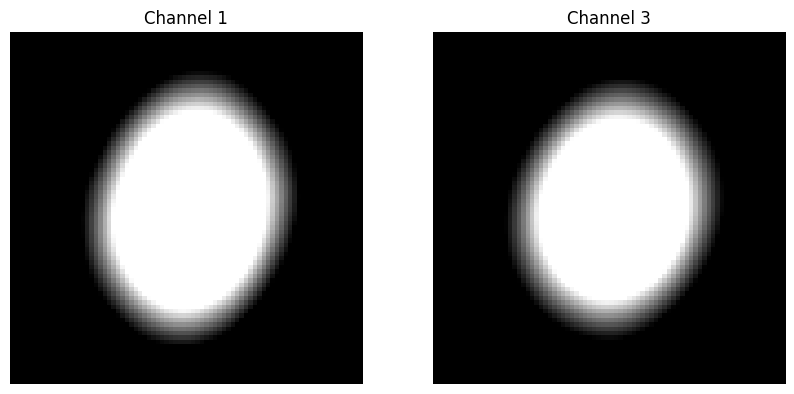

In [11]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns

# Display Channel 1
axes[0].imshow(cv2.cvtColor(channel1_image, cv2.COLOR_BGR2RGB))
axes[0].set_title("Channel 1")
axes[0].axis('off')  # Hide axes

# Display Channel 3
axes[1].imshow(cv2.cvtColor(channel3_image, cv2.COLOR_BGR2RGB))
axes[1].set_title("Channel 3")
axes[1].axis('off')  # Hide axes

# Show the images
plt.show()

In [7]:
identity = np.array_equal(channel1_image, channel3_image)

# Print result
if identity:
    print("The arrays are identical.")
else:
    print("The arrays are NOT identical.")

The arrays are NOT identical.


In [ ]:
'''
Audit results:

average_cell_image.pkl
contains: channel 1, channel2 cell image example
each image is 80,80 [pixels]; each pixel represents 0.325µm * 80 = 26µm

Notes:

hypothesis: in_development/yoav/marked_cell_detector/Calc_mean_filter.ipynb used to create this file

Each average cell image (2D) is created by calculating mean of sample neurons.

Steps to recreate:
1) read org. image (width=60000, height=34000) from brain 'DK55', section 172
Note: tiled due to memory constraints [only used (6800, 30000) of 'tile-5']
2) attributes: radius = 400 [only relevant so circles don't go off image]
3) load 115 pre-annotated cell points (assumed center of mass)
Note: summary img has 89 cells (only putative positive identified)
4) histogram w/ binning for QC check
'''